# Basic bandlimited wavetables

author: Igor Brkić &lt;i@hglt.ch&gt;

changes:
- 2018/10/08 as part of esp32 bass synth
- 2020/05/01 added envelope tables

This notebook generates wavetables (in C/C++ and Java) for four basic wave shapes (sine, triangle, sawtooth, square) of bandlimited waveforms. It also generates exponential rising and falling curve.

In [2]:
%matplotlib inline

import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [21]:
N = 512 # table size
fs = 44100
fmax = 400
T = 1.0/fmax*fs
print("%dHz signal at fs=%dHz has period %.2f samples" % (fmax, fs, T))

wmax = fmax/(fs/2)
# we can go up to w=0.5 max, let's play safe (due to the numeric errors) and limit this to 0.48
npartials = round(0.48/wmax)
print("Max number of partials for %.2f signal, without aliasing, is %d" % (fmax, npartials))

400Hz signal at fs=44100Hz has period 110.25 samples
Max number of partials for 400.00 signal, without aliasing, is 26


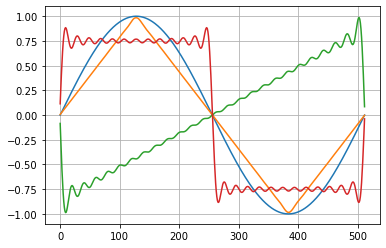

In [4]:
def waveform(wave, N, partials=2):
    sig = np.zeros(N)
    A = 1
    for n in range(partials):
        an = 0
        bn = 0
        if wave=='sawtooth':
            
            if n>0:
                bn = -math.sqrt(3) * A/math.pi/n*(-1)**n
            else:
                continue
        elif wave=='triangle':
            if n%2==1:
                an = 4 * A*(1-(-1)**n)/(math.pi**2 * n**2)
            else:
                continue
        elif wave=='square':
            dc = 0.5
            if n==0:
                an = 0
            elif n%2==1:
                an = 3.0 * A/(n*math.pi)*math.sin(n*math.pi*dc)
            else:
                continue;
        sig += an*np.cos(np.linspace(0, n*2*math.pi, N)) + bn*np.sin(np.linspace(0, n*2*math.pi, N))
    roll = 0
    if wave=='sawtooth':
        roll = round(N/2.0)
    elif wave=='triangle':
        roll = round(N/4.0)
    elif wave=='square':
        roll = round(N/4.0)
    return np.roll(sig, roll)

wfs = ('sine', 'triangle', 'sawtooth', 'square')
signal = {'sine': np.sin(np.linspace(0, 2*math.pi, N))}
for wf in wfs[1:]:
    signal[wf] = waveform(wf, N, npartials)
    
for wf, sig in signal.items():
    plt.plot(sig)
plt.grid()
#plt.legend(['sine (ref)', 'triangle', 'sawtooth', 'square'])


In [5]:
# C/C++ tables
print("const int wavetable_size = %d;"%(N,))
print("const int wavetable_num = 4;")
print("const float wavetable[4][%d] = {"%(N,))
for wf, sig in signal.items():
    print("\t// " + wf)
    print("\t{%s}," % (', '.join(["%.6f"%(v) for v in sig]),))
print("};")

const int wavetable_size = 512;
const int wavetable_num = 4;
const float wavetable[4][512] = {
	// sine
	{0.000000, 0.012296, 0.024589, 0.036879, 0.049164, 0.061441, 0.073708, 0.085965, 0.098208, 0.110437, 0.122649, 0.134842, 0.147016, 0.159166, 0.171293, 0.183394, 0.195467, 0.207511, 0.219523, 0.231502, 0.243446, 0.255353, 0.267222, 0.279050, 0.290836, 0.302578, 0.314275, 0.325923, 0.337523, 0.349071, 0.360567, 0.372008, 0.383393, 0.394720, 0.405988, 0.417194, 0.428336, 0.439415, 0.450426, 0.461370, 0.472244, 0.483046, 0.493776, 0.504430, 0.515009, 0.525509, 0.535931, 0.546271, 0.556528, 0.566702, 0.576790, 0.586790, 0.596702, 0.606524, 0.616253, 0.625890, 0.635432, 0.644878, 0.654227, 0.663477, 0.672626, 0.681674, 0.690618, 0.699458, 0.708193, 0.716820, 0.725339, 0.733748, 0.742047, 0.750233, 0.758306, 0.766264, 0.774106, 0.781831, 0.789439, 0.796926, 0.804293, 0.811539, 0.818662, 0.825661, 0.832535, 0.839284, 0.845905, 0.852399, 0.858764, 0.864999, 0.871103, 0.877076, 0.882916, 0.88

In [6]:
# Java tables
print("final int wavetable_size = %d;"%(N,))
print("final int wavetable_num = 4;")
print("final float[][] wavetable = {")
for wf, sig in signal.items():
    print("\t// " + wf)
    print("\t{%s}," % (', '.join(["%.6f"%(v) for v in sig]),))
print("};")

final int wavetable_size = 512;
final int wavetable_num = 4;
final float[][] wavetable = {
	// sine
	{0.000000, 0.012296, 0.024589, 0.036879, 0.049164, 0.061441, 0.073708, 0.085965, 0.098208, 0.110437, 0.122649, 0.134842, 0.147016, 0.159166, 0.171293, 0.183394, 0.195467, 0.207511, 0.219523, 0.231502, 0.243446, 0.255353, 0.267222, 0.279050, 0.290836, 0.302578, 0.314275, 0.325923, 0.337523, 0.349071, 0.360567, 0.372008, 0.383393, 0.394720, 0.405988, 0.417194, 0.428336, 0.439415, 0.450426, 0.461370, 0.472244, 0.483046, 0.493776, 0.504430, 0.515009, 0.525509, 0.535931, 0.546271, 0.556528, 0.566702, 0.576790, 0.586790, 0.596702, 0.606524, 0.616253, 0.625890, 0.635432, 0.644878, 0.654227, 0.663477, 0.672626, 0.681674, 0.690618, 0.699458, 0.708193, 0.716820, 0.725339, 0.733748, 0.742047, 0.750233, 0.758306, 0.766264, 0.774106, 0.781831, 0.789439, 0.796926, 0.804293, 0.811539, 0.818662, 0.825661, 0.832535, 0.839284, 0.845905, 0.852399, 0.858764, 0.864999, 0.871103, 0.877076, 0.882916, 0.888622

### Examples

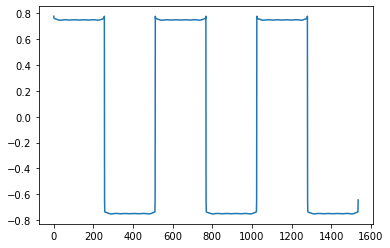

In [20]:
w = waveform('square', 512, partials=500)
plt.plot(np.concatenate([w, w, w]))

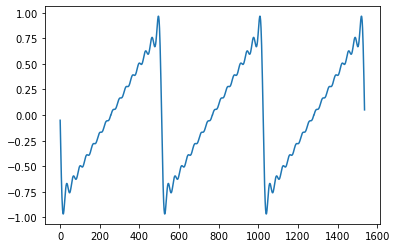

In [14]:
w = waveform('sawtooth', 512, partials=16)
plt.plot(np.concatenate([w, w, w]))

## Envelope generator

This section defines basic standard exponential rising and falling curves to be used as part of the envelope generator.

`slope` argument defines "exponentialness" of the curve where low numbers (<1) lead to almost linear rise/fall

In [9]:

def falling_exp(nsamples, slope=2):
    """
    Generate falling exponential usually used for decay and release phases
    """
    t = np.linspace(0, 1, nsamples)
    env = np.exp(slope*t)-1
    env /= max(env)
    return env[::-1]

def rising_exp(nsamples, slope=2):
    """
    Generates rising exponential usually used for attach phase
    """
    return 1-falling_exp(nsamples, slope)


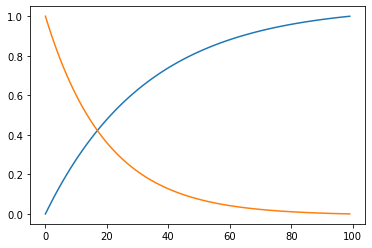

In [26]:
plt.plot(rising_exp(100, 3))
plt.plot(falling_exp(100, 5))

In [11]:
# C/C++ tables
N = 128
envs = [rising_exp(N, 4), falling_exp(N, 5)]
print("const int envelope_size = %d;"%(N,))
print("const int envelope_num = 2;")
print("const float envelope[2][%d] = {"%(N,))
for env in envs:
    print("\t{%s}," % (', '.join(["%.6f"%(v) for v in env]),))
print("};")

const int envelope_size = 128;
const int envelope_num = 2;
const float envelope[2][128] = {
	{0.000000, 0.031584, 0.062188, 0.091844, 0.120580, 0.148425, 0.175407, 0.201552, 0.226886, 0.251435, 0.275223, 0.298274, 0.320609, 0.342252, 0.363225, 0.383546, 0.403238, 0.422319, 0.440809, 0.458725, 0.476086, 0.492909, 0.509210, 0.525005, 0.540311, 0.555142, 0.569514, 0.583439, 0.596933, 0.610009, 0.622679, 0.634957, 0.646853, 0.658381, 0.669552, 0.680376, 0.690864, 0.701028, 0.710876, 0.720419, 0.729666, 0.738626, 0.747308, 0.755722, 0.763874, 0.771774, 0.779428, 0.786846, 0.794033, 0.800997, 0.807746, 0.814285, 0.820622, 0.826762, 0.832712, 0.838477, 0.844064, 0.849477, 0.854723, 0.859805, 0.864731, 0.869503, 0.874128, 0.878609, 0.882951, 0.887159, 0.891236, 0.895187, 0.899015, 0.902724, 0.906319, 0.909802, 0.913177, 0.916448, 0.919617, 0.922687, 0.925663, 0.928546, 0.931340, 0.934047, 0.936671, 0.939213, 0.941676, 0.944063, 0.946376, 0.948617, 0.950788, 0.952893, 0.954932, 0.956908, 0.9588

In [12]:
# Java tables
N = 128
envs = [rising_exp(N, 1), falling_exp(N, 5)]
print("final int envelope_size = %d;"%(N,))
print("final int envelope_num = 2;")
print("final float[][] envelope = {")
for env in envs:
    print("\t{%s}," % (', '.join(["%.6f"%(v) for v in env]),))
print("};")

final int envelope_size = 128;
final int envelope_num = 2;
final float[][] envelope = {
	{0.000000, 0.012408, 0.024718, 0.036932, 0.049050, 0.061072, 0.073001, 0.084836, 0.096578, 0.108228, 0.119787, 0.131255, 0.142633, 0.153922, 0.165123, 0.176235, 0.187261, 0.198199, 0.209053, 0.219821, 0.230504, 0.241104, 0.251620, 0.262055, 0.272407, 0.282678, 0.292868, 0.302979, 0.313010, 0.322963, 0.332838, 0.342635, 0.352355, 0.361999, 0.371567, 0.381061, 0.390480, 0.399825, 0.409096, 0.418295, 0.427422, 0.436478, 0.445462, 0.454376, 0.463219, 0.471994, 0.480700, 0.489337, 0.497907, 0.506409, 0.514845, 0.523215, 0.531519, 0.539757, 0.547932, 0.556042, 0.564088, 0.572072, 0.579993, 0.587851, 0.595648, 0.603384, 0.611059, 0.618674, 0.626230, 0.633726, 0.641163, 0.648542, 0.655863, 0.663126, 0.670333, 0.677483, 0.684577, 0.691615, 0.698599, 0.705527, 0.712401, 0.719221, 0.725988, 0.732702, 0.739363, 0.745971, 0.752528, 0.759034, 0.765488, 0.771892, 0.778245, 0.784549, 0.790803, 0.797009, 0.803165, 